<a href="https://colab.research.google.com/github/clive-limo/DataScienceProjects/blob/main/Predicting_Food_Order_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Food Order Demand

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

## Importing Data

In [ ]:
demand_data = pd.read_csv("Food demand.csv")
demand_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271


## Exploratory Data Analysis

### Data Description

In [ ]:
demand_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.001093e+06,75.393197,81.649825,2010.123562,327.302596,347.972866,0.076538,0.105053,258.340170
std,6.323493e+02,41.743802,46.139173,554.686525,150.906902,158.625091,0.265924,0.306698,413.743045
min,1.000000e+06,1.000000,10.000000,1062.000000,65.020000,93.120000,0.000000,0.000000,13.000000
25%,1.000546e+06,40.000000,43.000000,1543.000000,222.645000,242.530000,0.000000,0.000000,55.000000
50%,1.001094e+06,78.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,148.000000
75%,1.001638e+06,111.500000,110.000000,2539.000000,435.530000,447.230000,0.000000,0.000000,324.000000
max,1.002181e+06,145.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,12137.000000


In [ ]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1999 non-null   int64  
 1   week                   1999 non-null   int64  
 2   center_id              1999 non-null   int64  
 3   meal_id                1999 non-null   int64  
 4   checkout_price         1999 non-null   float64
 5   base_price             1999 non-null   float64
 6   emailer_for_promotion  1999 non-null   int64  
 7   homepage_featured      1999 non-null   int64  
 8   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


### Visualization

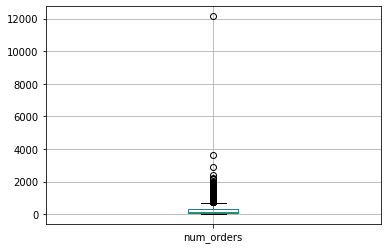

In [ ]:
demand_data[['num_orders']].boxplot()

### Correlation

In [ ]:
demand_data.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,1.000000,-0.018613,-0.009453,-0.001255,-0.003086,-0.010535,-0.024098,0.027497,0.019333
week,-0.018613,1.000000,0.020110,0.030394,-0.029735,-0.035094,-0.072733,-0.058740,-0.047281
center_id,-0.009453,0.020110,1.000000,0.026547,-0.014830,-0.005946,0.025927,-0.003942,-0.011406
meal_id,-0.001255,0.030394,0.026547,1.000000,0.031086,0.026637,0.030443,0.045784,0.008166
checkout_price,-0.003086,-0.029735,-0.014830,0.031086,1.000000,0.952669,0.018710,-0.064684,-0.232036
base_price,-0.010535,-0.035094,-0.005946,0.026637,0.952669,1.000000,0.179187,0.041757,-0.169653
emailer_for_promotion,-0.024098,-0.072733,0.025927,0.030443,0.018710,0.179187,1.000000,0.392302,0.266335
homepage_featured,0.027497,-0.058740,-0.003942,0.045784,-0.064684,0.041757,0.392302,1.000000,0.268688
num_orders,0.019333,-0.047281,-0.011406,0.008166,-0.232036,-0.169653,0.266335,0.268688,1.000000


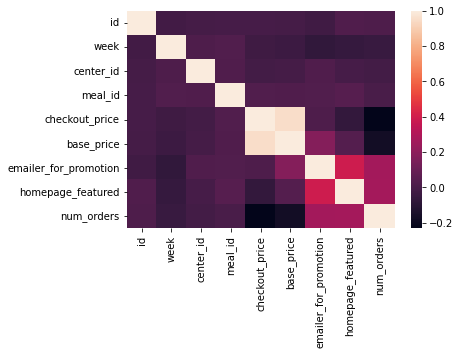

In [ ]:
sns.heatmap(demand_data.corr())

## Checking for null values

In [ ]:
demand_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

### Scale Dataset

In [ ]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(demand_data.drop('num_orders', axis=1))
columns = ['id','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']
scaled_data = pd.DataFrame(scaled_data, columns=columns)
scaled_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,0.000000,0.013889,0.835227,0.896515,0.240364,0.205737,0.0,0.0
1,0.000459,0.687500,0.534091,1.000000,0.599465,0.726643,0.0,0.0
2,0.000917,0.986111,0.369318,0.479937,0.375675,0.348170,0.0,0.0
3,0.001376,0.277778,0.079545,0.779831,0.114636,0.077735,0.0,0.0
4,0.001834,0.305556,0.414773,0.779831,0.042773,0.040373,0.0,0.0


There are no missing values in any of the variables in the dataset

## Prediction Model

### Split the dataset

In [ ]:
features = ['meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']
X = scaled_data.loc[:,features]
y = demand_data.loc[:,['num_orders']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

### Regression Model

In [ ]:
model = DecisionTreeRegressor(random_state = 0) 
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Results

In [ ]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.9700901193413769


### Prediction

In [ ]:
y_pred = model.predict(X_test)
results =pd.DataFrame(y_pred, columns=['Prediction'])
results.head()

,Prediction
0,33.0
1,15.0
2,20.0
3,134.0
4,41.0


In [ ]:
y_test.head()

,num_orders
405,15
1189,14
674,69
1358,67
810,40


The model had an overall accuracy of 97%.